In [1]:
# illustrative example of use VeraRubin 

### Loading a Custom Coadd from a Local Repository and Comparing it with the Original Deep Coadd

> Version: 1.0
> 
> Container Size: Large

> Description: In this notebook, we present an illustrative example of the use of the VeraRubin package, where we load a local custom coadd and perform comparisons with the original deep coadd.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Loading modules
import json
import numpy as np
import VeraRubin as vr

### Loading the custom coadd

In [4]:
# The information of the custom coadd is in the file "custom_coadd_info.txt" inside of the repo
repo_name = "local_repo"
local_repo_path = os.path.join(os.getenv("HOME"), repo_name) 
info_txt_path = os.path.join(local_repo_path, "custom_coadd_info.txt")

coadd_results_butler = vr.load_custom_coadd_from_file(info_txt_path)

In [5]:
with open(info_txt_path, "r") as f:
    info = json.load(f)
info

{'repo_path': '/home/arestrada88/local_repo',
 'collection': 'u/arestrada88/custom_coadd/20250809T165919Z',
 'coadd_type': 'deep_coadd_predetection',
 'tract': 5063,
 'patch': '34',
 'bands': ['g', 'r', 'i'],
 'instrument': 'LSSTComCam',
 'skymap': 'lsst_cells_v1'}

In [6]:
# Bands that we have on the repo
print(info['bands'])

['g', 'r', 'i']


# Some plots

In [7]:
# Making a butler instance
butler = vr.ExpButler(info=False)  # using default address

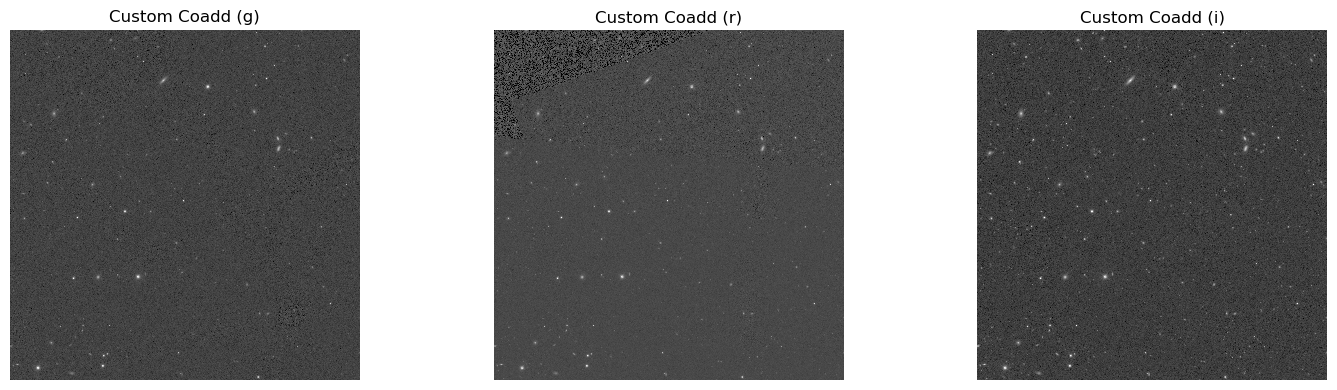

In [8]:
# Plotting only the custom coadds
vr.plot_compare(custom_coadd=coadd_results_butler,
                bands_to_plot=None,
                algorithm='asinh', min='zscale', max=None, unit=None)

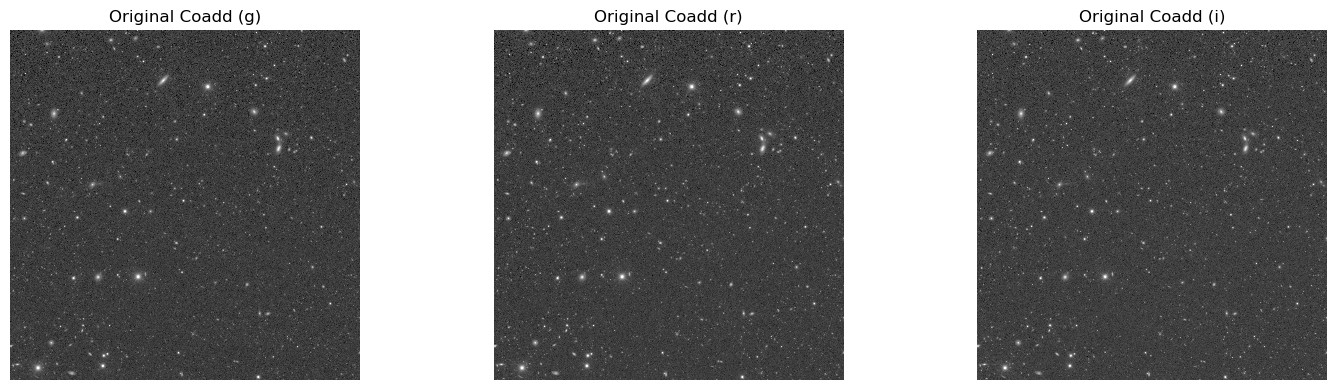

In [9]:
# Plotting only the original deep coadds
vr.plot_compare(
    butler=butler,
    my_tract=info['tract'],
    my_patch=int(info['patch']),
    bands_to_plot=info['bands'],
    skymap_name=info['skymap'],
    algorithm='asinh', min='zscale', max=None, unit=None)

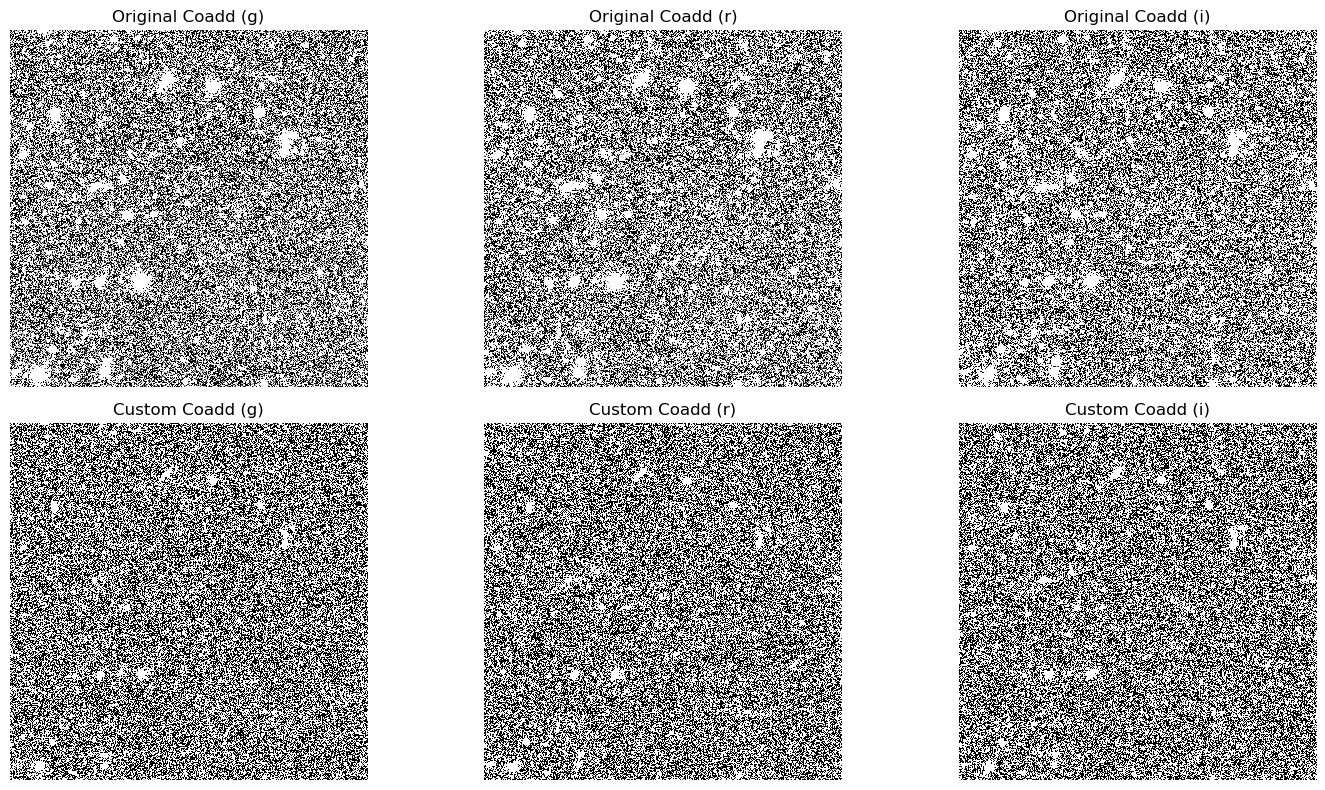

In [10]:
# Ploting both
vr.plot_compare(
    butler=butler,
    my_tract=info['tract'],
    my_patch=int(info['patch']),
    skymap_name=info['skymap'],
    custom_coadd=coadd_results_butler,
    bands_to_plot=None,  # None imply that take the bands of custom_coadd
    algorithm='linear', min=-0.3, max=0.5, unit=None)  # notice that we change the plot algoritnm

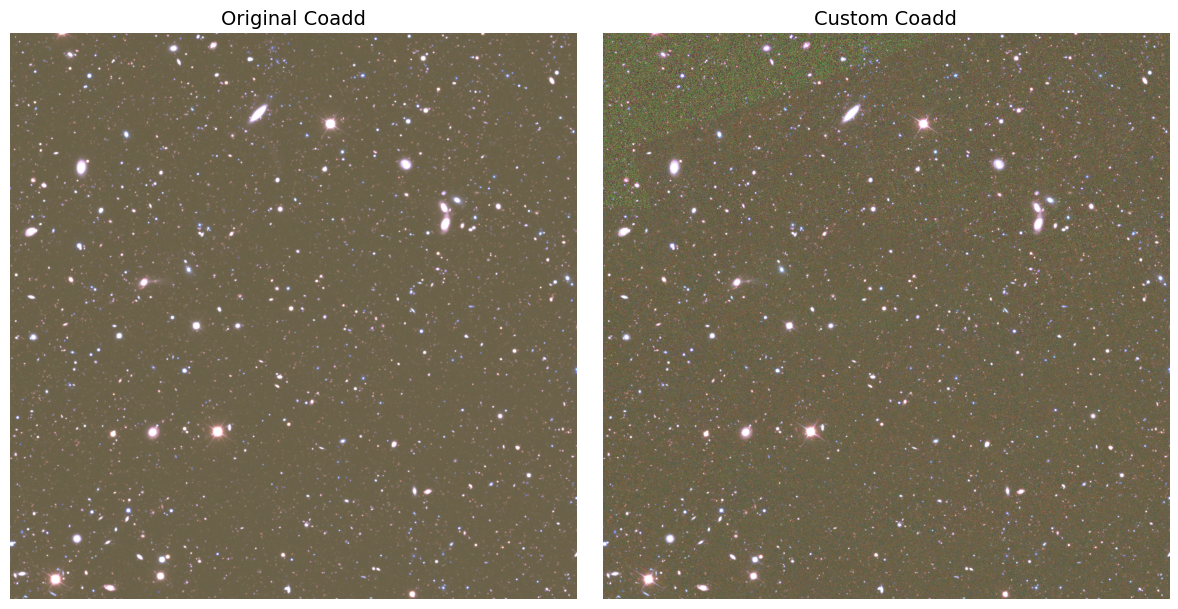

Displayed RGB comparison using bands ('g', 'r', 'i') (normalize_together=True).


In [11]:
# RGB
vr.compare_rgb_coadds(custom_coadd=coadd_results_butler, butler=butler,
                      my_tract=info['tract'],
                      my_patch=int(info['patch']),
                      skymap_name=info['skymap'],
                      bands=('g', 'r', 'i'),
                      titles=("Original Coadd", "Custom Coadd"),
                     normalize_together=True)

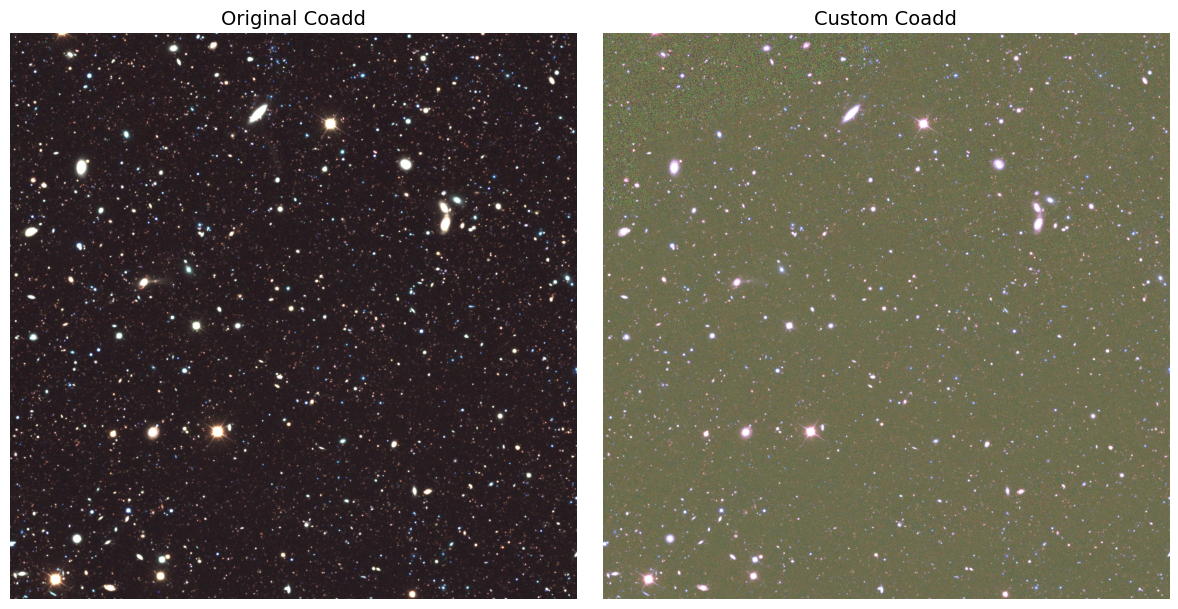

Displayed RGB comparison using bands ('g', 'r', 'i') (normalize_together=False).


In [12]:
# RGB
vr.compare_rgb_coadds(custom_coadd=coadd_results_butler, butler=butler,
                      my_tract=info['tract'],
                      my_patch=int(info['patch']),
                      skymap_name=info['skymap'],
                      bands=('g', 'r', 'i'),
                      titles=("Original Coadd", "Custom Coadd"),
                     normalize_together=False)